In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import urllib.request as req
import time
import folium
import geopandas as gpd
import html5lib as html
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

df = pd.read_csv("../JejuData/jeju_rec.csv")

df['읍면동명'] = df['읍면동명'].str.replace("1","일")
df['읍면동명'] = df['읍면동명'].str.replace("2","이")
# df['읍면동명'].unique()

df.reset_index(inplace=True,drop=True)
data=df.copy()

for column in ['읍면동명','업종명']:
    df_total2=pd.get_dummies(df[column],prefix=column)
    data=pd.concat([data,df_total2],axis=1)

data.drop(columns=['년월', '시도명', '읍면동명', '업종명', '이용자수', '총 유동인구', '연도', '월'],inplace=True)

knn=KNeighborsRegressor(n_jobs=-1)

train_input,test_input,train_target,test_target=train_test_split(data.iloc[:,1:],data[['이용금액']],random_state=42)

scores=cross_validate(knn,train_input,train_target,n_jobs=-1,cv=3)
print(np.mean(scores['test_score']))
print(np.mean(scores['score_time']))

0.9572378103146352
0.9740813573201498


In [214]:
df.drop(columns=['권역','분기','cluster_id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년월      15586 non-null  object 
 1   시도명     15586 non-null  object 
 2   읍면동명    15586 non-null  object 
 3   업종명     15586 non-null  object 
 4   이용자수    15586 non-null  int64  
 5   이용금액    15586 non-null  int64  
 6   총 유동인구  15586 non-null  float64
 7   연도      15586 non-null  int64  
 8   월       15586 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.1+ MB


In [215]:
df

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,연도,월,권역,분기,cluster_id
0,2018-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
1,2018-01,서귀포시,남원읍,기타 외국식 음식점업,173,4998000,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
2,2018-01,서귀포시,남원읍,비알콜 음료점업,432,5110800,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
3,2018-01,서귀포시,남원읍,빵 및 과자류 소매업,1003,13434780,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
4,2018-01,서귀포시,남원읍,서양식 음식점업,2660,48084140,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15581,2021-05,서귀포시,천지동,빵 및 과자류 소매업,7298,129770690,10227689.92300,2021,5,서귀포시 동권역,2/4분기,8
15582,2021-05,서귀포시,천지동,비알콜 음료점업,7527,83256320,10227689.92300,2021,5,서귀포시 동권역,2/4분기,8
15583,2021-05,서귀포시,천지동,기타 외국식 음식점업,965,33476100,10227689.92300,2021,5,서귀포시 동권역,2/4분기,0
15584,2021-05,서귀포시,천지동,관광 민예품 및 선물용품 소매업,1903,44802148,10227689.92300,2021,5,서귀포시 동권역,2/4분기,0


In [203]:
jejusi_dong = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동']
jejusi_seobu = ['한림읍','애월읍','한경면','추자면']
jejusi_dongbu = ['조천읍','구좌읍','우도면']
seogwiposi_dong = ['송산동','정방동','중앙동','천지동','효돈동','영천동','동홍동','서홍동','대륜동','대천동','중문동','예래동']
seogwiposi_seobu = ['대정읍','안덕면']
seogwiposi_dongbu = ['남원읍','성산읍','표선면']
jeju_area = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동','한림읍','애월읍','한경면','조천읍','구좌읍','송산동','정방동','중앙동','천지동','효돈동','영천동','동홍동','서홍동','대륜동','대천동','중문동','예래동','대정읍','안덕면','남원읍','성산읍','표선면','추자면','우도면']

In [204]:
df.loc[df['읍면동명'].isin(jejusi_dong), '권역'] = '제주시 동권역'
df.loc[df['읍면동명'].isin(jejusi_seobu), '권역'] = '제주시 서부권역'
df.loc[df['읍면동명'].isin(jejusi_dongbu), '권역'] = '제주시 동부권역'
df.loc[df['읍면동명'].isin(seogwiposi_dong), '권역'] = '서귀포시 동권역'
df.loc[df['읍면동명'].isin(seogwiposi_seobu), '권역'] = '서귀포시 서부권역'
df.loc[df['읍면동명'].isin(seogwiposi_dongbu), '권역'] = '서귀포시 동부권역'

In [ ]:
df['권역'].unique()

In [205]:
df.loc[df['월'].isin(list(range(1,4))), '분기'] = '1/4분기'
df.loc[df['월'].isin(list(range(4,7))), '분기'] = '2/4분기'
df.loc[df['월'].isin(list(range(7,10))), '분기'] = '3/4분기'
df.loc[df['월'].isin(list(range(10,13))), '분기'] = '4/4분기'

In [207]:
df.to_csv("../JejuData/jeju_data.csv",index=False)

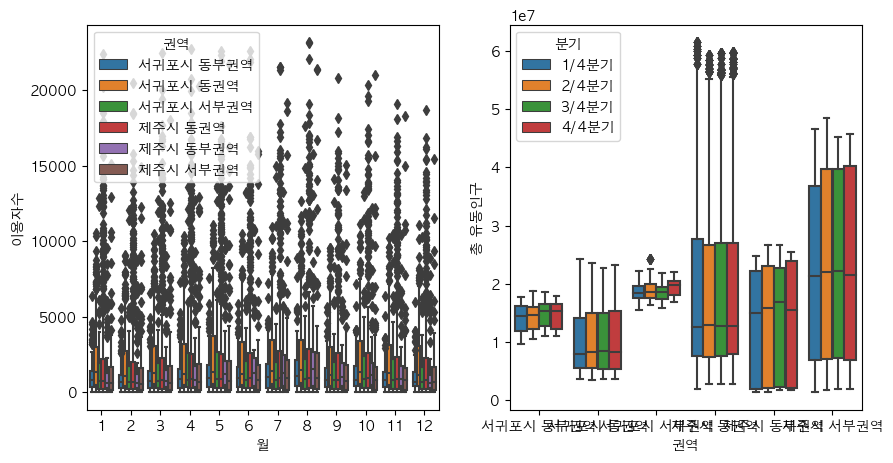

In [201]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
sns.boxplot(x='월',y='이용자수',data=df[df['업종명']!='한식 음식점업'],hue='권역',ax=ax1)
sns.boxplot(x='권역',y='총 유동인구',data=df,hue='분기',ax=ax2)
plt.show()

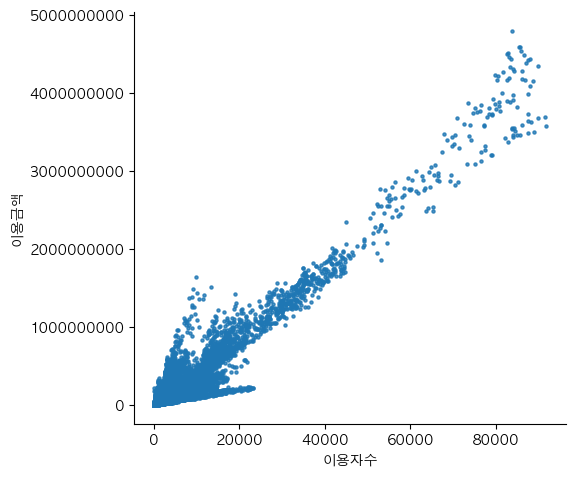

In [148]:
sns.lmplot(x='이용자수',y='이용금액',data = df, fit_reg=False, scatter_kws={'s':5})
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

In [209]:
from sklearn.cluster import KMeans
data_points = df.iloc[:,4:7].values
kmeans = KMeans(n_clusters=10).fit(data_points)
kmeans.cluster_centers_
kmeans.labels_
print(kmeans.labels_)
df['cluster_id'] = kmeans.labels_
df.head()

[0 0 0 ... 0 0 2]


,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,연도,월,권역,분기,cluster_id
0,2018-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
1,2018-01,서귀포시,남원읍,기타 외국식 음식점업,173,4998000,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
2,2018-01,서귀포시,남원읍,비알콜 음료점업,432,5110800,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
3,2018-01,서귀포시,남원읍,빵 및 과자류 소매업,1003,13434780,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0
4,2018-01,서귀포시,남원읍,서양식 음식점업,2660,48084140,15559582.61000,2018,1,서귀포시 동부권역,1/4분기,0


In [162]:
df['읍면동명'].unique()

array(['남원읍', '대륜동', '대정읍', '대천동', '동홍동', '서홍동', '성산읍', '송산동', '안덕면',
       '영천동', '예래동', '정방동', '중문동', '중앙동', '천지동', '표선면', '효돈동', '건입동',
       '구좌읍', '노형동', '도두동', '봉개동', '삼도일동', '삼도이동', '삼양동', '아라동', '애월읍',
       '연동', '오라동', '외도동', '용담일동', '용담이동', '우도면', '이도일동', '이도이동', '이호동',
       '일도일동', '일도이동', '조천읍', '추자면', '한경면', '한림읍', '화북동'], dtype=object)

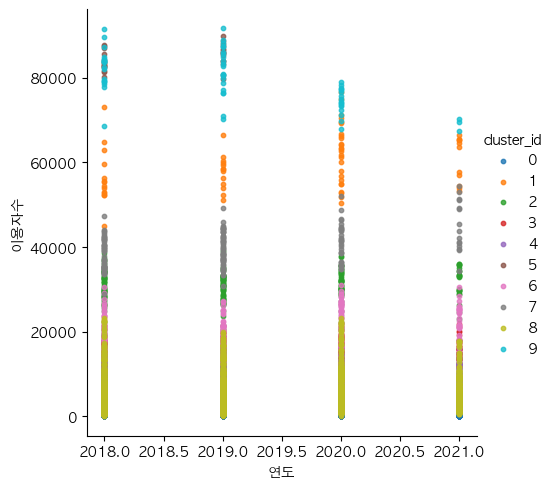

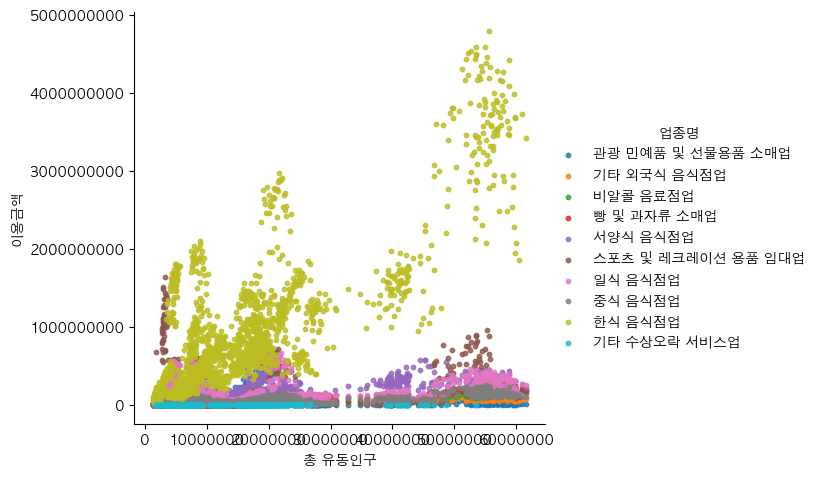

In [211]:
sns.lmplot(
    x='연도',
    y='이용자수',
    hue='cluster_id',
    data=df,
    fit_reg=False, 
    scatter_kws={'s':10}
)
sns.lmplot(
    x='총 유동인구',
    y='이용금액',
    hue='업종명',
    data=df,
    fit_reg=False, 
    scatter_kws={'s':10}
)
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

In [154]:
df[['cluster_id','권역']]

,cluster_id,권역
0,0,서귀포시 동부권역
1,0,서귀포시 동부권역
2,0,서귀포시 동부권역
3,0,서귀포시 동부권역
4,0,서귀포시 동부권역
...,...,...
15581,0,서귀포시 동권역
15582,0,서귀포시 동권역
15583,0,서귀포시 동권역
15584,0,서귀포시 동권역


In [129]:
df

,년월,시도명,읍면동명,업종명,이용자수,이용금액,총 유동인구,연도,월
0,2018-01,서귀포시,남원읍,관광 민예품 및 선물용품 소매업,147,5320500,15559582.61000,2018,1
1,2018-01,서귀포시,남원읍,기타 외국식 음식점업,173,4998000,15559582.61000,2018,1
2,2018-01,서귀포시,남원읍,비알콜 음료점업,432,5110800,15559582.61000,2018,1
3,2018-01,서귀포시,남원읍,빵 및 과자류 소매업,1003,13434780,15559582.61000,2018,1
4,2018-01,서귀포시,남원읍,서양식 음식점업,2660,48084140,15559582.61000,2018,1
...,...,...,...,...,...,...,...,...,...
15581,2021-05,서귀포시,천지동,빵 및 과자류 소매업,7298,129770690,10227689.92300,2021,5
15582,2021-05,서귀포시,천지동,비알콜 음료점업,7527,83256320,10227689.92300,2021,5
15583,2021-05,서귀포시,천지동,기타 외국식 음식점업,965,33476100,10227689.92300,2021,5
15584,2021-05,서귀포시,천지동,관광 민예품 및 선물용품 소매업,1903,44802148,10227689.92300,2021,5


In [64]:
data

,이용금액,읍면동명_건입동,읍면동명_구좌읍,읍면동명_남원읍,읍면동명_노형동,읍면동명_대륜동,읍면동명_대정읍,읍면동명_대천동,읍면동명_도두동,읍면동명_동홍동,...,업종명_관광 민예품 및 선물용품 소매업,업종명_기타 수상오락 서비스업,업종명_기타 외국식 음식점업,업종명_비알콜 음료점업,업종명_빵 및 과자류 소매업,업종명_서양식 음식점업,업종명_스포츠 및 레크레이션 용품 임대업,업종명_일식 음식점업,업종명_중식 음식점업,업종명_한식 음식점업
0,5320500,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4998000,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5110800,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,13434780,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,48084140,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,129770690,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15582,83256320,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15583,33476100,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15584,44802148,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
data.columns

Index(['이용금액', '읍면동명_건입동', '읍면동명_구좌읍', '읍면동명_남원읍', '읍면동명_노형동', '읍면동명_대륜동',
       '읍면동명_대정읍', '읍면동명_대천동', '읍면동명_도두동', '읍면동명_동홍동', '읍면동명_봉개동', '읍면동명_삼도이동',
       '읍면동명_삼도일동', '읍면동명_삼양동', '읍면동명_서홍동', '읍면동명_성산읍', '읍면동명_송산동', '읍면동명_아라동',
       '읍면동명_안덕면', '읍면동명_애월읍', '읍면동명_연동', '읍면동명_영천동', '읍면동명_예래동', '읍면동명_오라동',
       '읍면동명_외도동', '읍면동명_용담이동', '읍면동명_용담일동', '읍면동명_우도면', '읍면동명_이도이동',
       '읍면동명_이도일동', '읍면동명_이호동', '읍면동명_일도이동', '읍면동명_일도일동', '읍면동명_정방동',
       '읍면동명_조천읍', '읍면동명_중문동', '읍면동명_중앙동', '읍면동명_천지동', '읍면동명_추자면', '읍면동명_표선면',
       '읍면동명_한경면', '읍면동명_한림읍', '읍면동명_화북동', '읍면동명_효돈동', '업종명_관광 민예품 및 선물용품 소매업',
       '업종명_기타 수상오락 서비스업', '업종명_기타 외국식 음식점업', '업종명_비알콜 음료점업',
       '업종명_빵 및 과자류 소매업', '업종명_서양식 음식점업', '업종명_스포츠 및 레크레이션 용품 임대업',
       '업종명_일식 음식점업', '업종명_중식 음식점업', '업종명_한식 음식점업'],
      dtype='object')

In [59]:
data.columns[data.columns.str.contains('읍면동명')].str[5:]

Index(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도이동', '삼도일동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동',
       '영천동', '예래동', '오라동', '외도동', '용담이동', '용담일동', '우도면', '이도이동', '이도일동',
       '이호동', '일도이동', '일도일동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면',
       '한경면', '한림읍', '화북동', '효돈동'],
      dtype='object')

In [60]:
len(data.columns.str.contains('읍면동명'))

54

In [26]:
jejusi_dong2 = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','건입동','용담일동','용담이동','용담삼동','화북일동','화북이동','삼양일동','삼양이동','삼양삼동','봉개동','아라일동','아라이동','오라일동','오라이동','오라삼동','노형동','외도일동','외도이동','이호일동','이호이동','도두일동','도두이동','도남동','도련일동','도련이동','용강동','회천동','오등동','월평동','영평동','연동','도평동','해안동','내도동']
jejusi_seobu2 = ['한림읍','애월읍','한경면','추자면']
jejusi_dongbu2 = ['조천읍','구좌읍','우도면']
seogwiposi_dong2 = ['서귀동','법환동','서호동','호근동','동홍동','서홍동','상효동','하효동','신효동','보목동','토평동','중문동','회수동','대포동','월평동','강정동','도순동','하원동','색달동','상예동','하예동','영남동']
seogwiposi_seobu2 = ['대정읍','안덕면']
seogwiposi_dongbu2 = ['남원읍','성산읍','표선면']
jeju_area2 = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','건입동','용담일동','용담이동','용담삼동','화북일동','화북이동','삼양일동','삼양이동','삼양삼동','봉개동','아라일동','아라이동','오라일동','오라이동','오라삼동','노형동','외도일동','외도이동','이호일동','이호이동','도두일동','도두이동','도남동','도련일동','도련이동','용강동','회천동','오등동','월평동','영평동','연동','도평동','해안동','내도동','서귀동','법환동','서호동','호근동','동홍동','서홍동','상효동','하효동','신효동','보목동','토평동','중문동','회수동','대포동','월평동','강정동','도순동','하원동','색달동','상예동','하예동','영남동']

In [27]:
len(jeju_area2)

62

In [28]:
jejusi_dong = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동']
jejusi_seobu = ['한림읍','애월읍','한경면','추자면']
jejusi_dongbu = ['조천읍','구좌읍','우도면']
seogwiposi_dong = ['송산동','정방동','중앙동','천지동','효돈동','영천동','동홍동','서홍동','대륜동','대천동','중문동','예래동']
seogwiposi_seobu = ['대정읍','안덕면']
seogwiposi_dongbu = ['남원읍','성산읍','표선면']
jeju_area = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동','한림읍','애월읍','한경면','조천읍','구좌읍','송산동','정방동','중앙동','천지동','효돈동','영천동','동홍동','서홍동','대륜동','대천동','중문동','예래동','대정읍','안덕면','남원읍','성산읍','표선면','추자면','우도면']

In [29]:
len(jeju_area)

43

In [62]:
len(data.columns[data.columns.str.contains('읍면동명')].str[5:])

43

---
### 경제지표와 관광객 수 병합

In [112]:
jeju_total = pd.read_csv("../JejuData/jeju_total_cleaned.csv")

In [113]:
df_tourists = jeju_total.groupby(['연도','월']).sum()

In [114]:
currency = pd.read_csv("../JejuData/USD_KRW_2019_01_2022_11.csv",thousands = ',')
# currency = currency.sort_values('날짜',ascending=True)

In [115]:
currency.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022- 11- 01,1301.65000,1427.03000,1429.63000,1300.60000,NaN,-8.71%
1,2022- 10- 01,1425.83000,1440.23000,1446.62000,1397.24000,NaN,-0.98%
2,2022- 09- 01,1439.96000,1341.76000,1445.64000,1341.10000,NaN,7.36%
3,2022- 08- 01,1341.19000,1303.29000,1353.54000,1294.54000,NaN,2.93%
4,2022- 07- 01,1302.97000,1288.05000,1329.58000,1287.80000,NaN,1.20%


In [116]:
currency['종가'].head()

0   1301.65000
1   1425.83000
2   1439.96000
3   1341.19000
4   1302.97000
Name: 종가, dtype: float64

In [124]:
jeju_total

,연도,월,권역,읍면동,관광지 수,면적,방문자수,년월
0,2019,1,제주시 동권역,건입동,8.00000,2825867.00000,128123,None
1,2019,2,제주시 동권역,건입동,8.00000,2825867.00000,115266,None
2,2019,3,제주시 동권역,건입동,8.00000,2825867.00000,132868,None
3,2019,4,제주시 동권역,건입동,8.00000,2825867.00000,141119,None
4,2019,5,제주시 동권역,건입동,8.00000,2825867.00000,145939,None
...,...,...,...,...,...,...,...,...
1264,2022,7,제주시 서부권역,한림읍,64.00000,91090000.00000,794794,None
1265,2022,8,제주시 서부권역,한림읍,64.00000,91090000.00000,937798,None
1266,2022,9,제주시 서부권역,한림읍,64.00000,91090000.00000,550934,None
1267,2022,10,제주시 서부권역,한림읍,64.00000,91090000.00000,688258,None
